In [16]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [17]:
with open("preprocessed_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"].values
X_val   = data["X_val"].values
X_test  = data["X_test"].values
y_train = data["y_train"].values
y_val   = data["y_val"].values
y_test  = data["y_test"].values

In [18]:
def create_sequences(X, y, seq_len=30):
    X_seq = []
    y_seq = []

    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])

    return np.array(X_seq), np.array(y_seq)



In [19]:
SEQ_LEN = 30  # window size

X_train_seq, y_train_seq = create_sequences(X_train, y_train, SEQ_LEN)
X_val_seq,   y_val_seq   = create_sequences(X_val, y_val, SEQ_LEN)
X_test_seq,  y_test_seq  = create_sequences(X_test, y_test, SEQ_LEN)

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[SEQ_LEN, X_train_seq.shape[2]]))
for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(
        filters=32,
        kernel_size=2,
        padding="causal",
        activation="relu",
        dilation_rate=rate
    ))

model.add(keras.layers.Conv1D(filters=1, kernel_size=1))

# Flatten for regression output
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1))


model.compile(loss="mse", optimizer="adam", metrics=["mae"])


C:\Users\Patrick\PycharmProjects\PythonProject1\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [21]:
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=20,
    batch_size=64
)


Epoch 1/20
15579/15579 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - loss: 16.7994 - mae: 2.3916 - val_loss: 15.3119 - val_mae: 2.4384
Epoch 2/20
15579/15579 ━━━━━━━━━━━━━━━━━━━━ 102s 7ms/step - loss: 13.4259 - mae: 2.1042 - val_loss: 17.9865 - val_mae: 2.5522
Epoch 3/20
15579/15579 ━━━━━━━━━━━━━━━━━━━━ 151s 7ms/step - loss: 12.2918 - mae: 2.0021 - val_loss: 12.6645 - val_mae: 2.0907
Epoch 4/20
15579/15579 ━━━━━━━━━━━━━━━━━━━━ 110s 7ms/step - loss: 11.5464 - mae: 1.9335 - val_loss: 12.3540 - val_mae: 2.0130
Epoch 5/20
15579/15579 ━━━━━━━━━━━━━━━━━━━━ 143s 7ms/step - loss: 10.9943 - mae: 1.8850 - val_loss: 11.8837 - val_mae: 1.9229
Epoch 6/20
15579/15579 ━━━━━━━━━━━━━━━━━━━━ 142s 7ms/step - loss: 10.5837 - mae: 1.8495 - val_loss: 13.0733 - val_mae: 2.2334
Epoch 7/20
15579/15579 ━━━━━━━━━━━━━━━━━━━━ 112s 7ms/step - loss: 10.2606 - mae: 1.8199 - val_loss: 13.0200 - val_mae: 2.1447
Epoch 8/20
15579/15579 ━━━━━━━━━━━━━━━━━━━━ 142s 7ms/step - loss: 9.9632 - mae: 1.7924 - val_loss: 12.1460 - val_mae: 2

In [22]:
preds = model.predict(X_test_seq).flatten()
rmse = np.sqrt(mean_squared_error(y_test_seq, preds))

print("WaveNet RMSE:", rmse)


6676/6676 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
WaveNet RMSE: 3.312314320644121


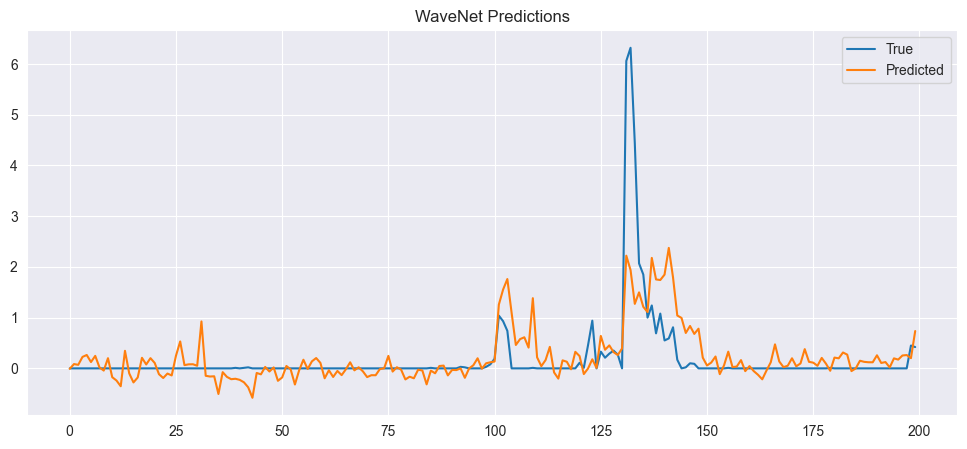

In [23]:
plt.figure(figsize=(12,5))
plt.plot(y_test_seq[:200], label="True")
plt.plot(preds[:200], label="Predicted")
plt.title("WaveNet Predictions")
plt.legend()
plt.show()